In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
print('Libraries imported.')

# training constants
BATCH_SIZE = 128
N_EPOCH = 200
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

(input_X_train,output_y_train), (input_X_test,output_y_test) = cifar10.load_data()
print(input_X_train.shape[0], "train samples")
print(input_X_test.shape[0], "test samples")

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

Libraries imported.
Main variables initialised.
Image variables initialisation
170498071/170498071 [==============================] - 3s 0us/step
50000 train samples
10000 test samples


In [ ]:
# network definition 128 neurons per hidden layer
model_neurons_128 = Sequential()

model_neurons_128.add(Conv2D(32, (3, 3), padding='same',input_shape=input_X_train.shape[1:]))
model_neurons_128.add(Activation('relu'))
model_neurons_128.add(Conv2D(32, (3, 3)))
model_neurons_128.add(Activation('relu'))
model_neurons_128.add(MaxPooling2D(pool_size=(2, 2)))
model_neurons_128.add(Dropout(0.25))

model_neurons_128.add(Conv2D(64, (3, 3), padding='same'))
model_neurons_128.add(Activation('relu'))
model_neurons_128.add(Conv2D(64, (3, 3)))
model_neurons_128.add(Activation('relu'))
model_neurons_128.add(MaxPooling2D(pool_size=(2, 2)))
model_neurons_128.add(Dropout(0.25))

model_neurons_128.add(Flatten())
model_neurons_128.add(Dense(128))
model_neurons_128.add(Activation('relu'))
model_neurons_128.add(Dropout(0.25))

model_neurons_128.add(Dense(N_CLASSES))
model_neurons_128.add(Activation('softmax'))

# network definition 256 neurons per hidden layer
model_neurons_256 = Sequential()

model_neurons_256.add(Conv2D(32, (3, 3), padding='same',input_shape=input_X_train.shape[1:]))
model_neurons_256.add(Activation('relu'))
model_neurons_256.add(Conv2D(32, (3, 3)))
model_neurons_256.add(Activation('relu'))
model_neurons_256.add(MaxPooling2D(pool_size=(2, 2)))
model_neurons_256.add(Dropout(0.25))

model_neurons_256.add(Conv2D(64, (3, 3), padding='same'))
model_neurons_256.add(Activation('relu'))
model_neurons_256.add(Conv2D(64, (3, 3)))
model_neurons_256.add(Activation('relu'))
model_neurons_256.add(MaxPooling2D(pool_size=(2, 2)))
model_neurons_256.add(Dropout(0.25))

model_neurons_256.add(Flatten())
model_neurons_256.add(Dense(256))
model_neurons_256.add(Activation('relu'))
model_neurons_256.add(Dropout(0.25))

model_neurons_256.add(Dense(N_CLASSES))
model_neurons_256.add(Activation('softmax'))

# network definition 512 neurons per hidden layer
model_neurons_512 = Sequential()

model_neurons_512.add(Conv2D(32, (3, 3), padding='same',input_shape=input_X_train.shape[1:]))
model_neurons_512.add(Activation('relu'))
model_neurons_512.add(Conv2D(32, (3, 3)))
model_neurons_512.add(Activation('relu'))
model_neurons_512.add(MaxPooling2D(pool_size=(2, 2)))
model_neurons_512.add(Dropout(0.25))

model_neurons_512.add(Conv2D(64, (3, 3), padding='same'))
model_neurons_512.add(Activation('relu'))
model_neurons_512.add(Conv2D(64, (3, 3)))
model_neurons_512.add(Activation('relu'))
model_neurons_512.add(MaxPooling2D(pool_size=(2, 2)))
model_neurons_512.add(Dropout(0.25))

model_neurons_512.add(Flatten())
model_neurons_512.add(Dense(512))
model_neurons_512.add(Activation('relu'))
model_neurons_512.add(Dropout(0.25))

model_neurons_512.add(Dense(N_CLASSES))
model_neurons_512.add(Activation('softmax'))

model_neurons_128.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model_neurons_256.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model_neurons_512.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

history_neurons_128 = model_neurons_128.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_neurons_128.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

history_neurons_256 = model_neurons_256.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_neurons_256.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

history = model_neurons_512.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_neurons_512.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/200
313/313 [==============================] - 11s 20ms/step - loss: 1.8716 - accuracy: 0.3194 - val_loss: 1.5153 - val_accuracy: 0.4501
Epoch 2/200
313/313 [==============================] - 4s 13ms/step - loss: 1.5074 - accuracy: 0.4592 - val_loss: 1.2549 - val_accuracy: 0.5455
Epoch 3/200
313/313 [==============================] - 4s 13ms/step - loss: 1.3371 - accuracy: 0.5263 - val_loss: 1.2842 - val_accuracy: 0.5521
Epoch 4/200
313/313 [==============================] - 5s 15ms/step - loss: 1.2121 - accuracy: 0.5715 - val_loss: 1.0509 - val_accuracy: 0.6279
Epoch 5/200
313/313 [==============================] - 4s 14ms/step - loss: 1.1099 - accuracy: 0.6122 - val_loss: 1.0595 - val_accuracy: 0.6267
Epoch 6/200
313/313 [==============================] - 4s 13ms/step - loss: 1.0405 - accuracy: 0.6381 - val_loss: 0.9529 - val_accuracy: 0.6642
Epoch 7/200
313/313 [==============================] - 4s 13ms/step - loss: 0.9732 - accuracy: 0.6614 - val_loss: 0.8787 - val_accuracy

In [ ]:
model_neurons_128.save_weights('cifar10_model_neurons_128.h5', overwrite=True)
history_neurons_256.save_weights('cifar10_model_neurons_256.h5', overwrite=True)
model_neurons_512.save_weights('cifar10_model_neurons_512.h5', overwrite=True)

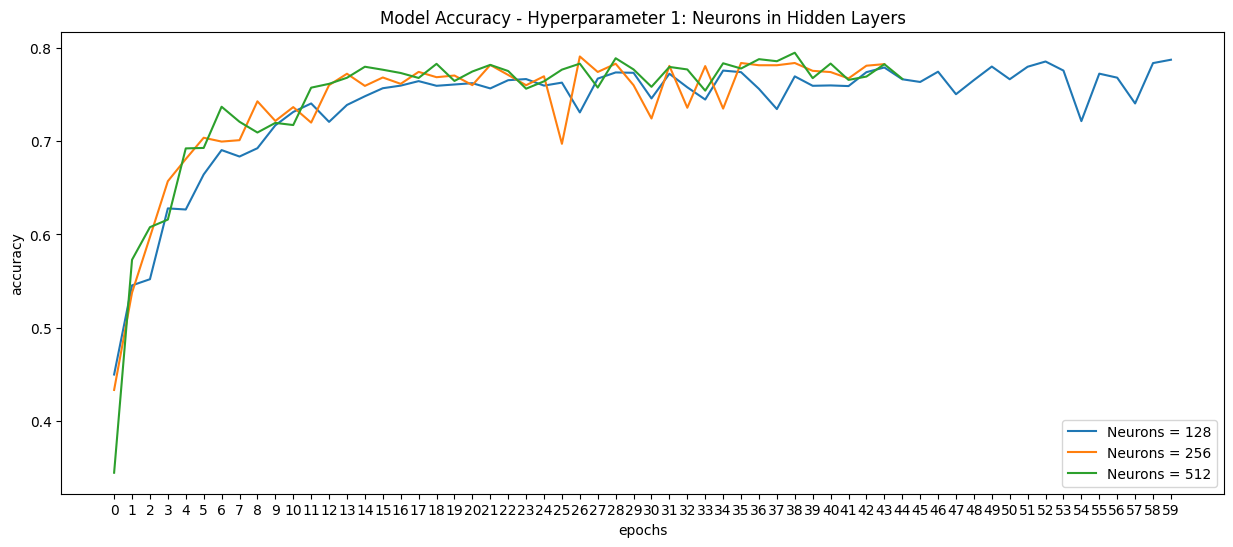

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(history_neurons_128.history['val_accuracy'])
plt.plot(history_neurons_256.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Hyperparameter 1: Neurons in Hidden Layers')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Neurons = 128', 'Neurons = 256', 'Neurons = 512'], loc='lower right')
plt.xticks(range(0, 60))
plt.show()

In [ ]:
# network definition dropout rate 0.25
model_dropout_025 = Sequential()

model_dropout_025.add(Conv2D(32, (3, 3), padding='same',input_shape=input_X_train.shape[1:]))
model_dropout_025.add(Activation('relu'))
model_dropout_025.add(Conv2D(32, (3, 3)))
model_dropout_025.add(Activation('relu'))
model_dropout_025.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_025.add(Dropout(0.25))

model_dropout_025.add(Conv2D(64, (3, 3), padding='same'))
model_dropout_025.add(Activation('relu'))
model_dropout_025.add(Conv2D(64, (3, 3)))
model_dropout_025.add(Activation('relu'))
model_dropout_025.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_025.add(Dropout(0.25))

model_dropout_025.add(Flatten())
model_dropout_025.add(Dense(512))
model_dropout_025.add(Activation('relu'))
model_dropout_025.add(Dropout(0.25))

model_dropout_025.add(Dense(N_CLASSES))
model_dropout_025.add(Activation('softmax'))

# network definition dropout rate 0.3
model_dropout_03 = Sequential()

model_dropout_03.add(Conv2D(32, (3, 3), padding='same',input_shape=input_X_train.shape[1:]))
model_dropout_03.add(Activation('relu'))
model_dropout_03.add(Conv2D(32, (3, 3)))
model_dropout_03.add(Activation('relu'))
model_dropout_03.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_03.add(Dropout(0.3))

model_dropout_03.add(Conv2D(64, (3, 3), padding='same'))
model_dropout_03.add(Activation('relu'))
model_dropout_03.add(Conv2D(64, (3, 3)))
model_dropout_03.add(Activation('relu'))
model_dropout_03.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_03.add(Dropout(0.3))

model_dropout_03.add(Flatten())
model_dropout_03.add(Dense(512))
model_dropout_03.add(Activation('relu'))
model_dropout_03.add(Dropout(0.3))

model_dropout_03.add(Dense(N_CLASSES))
model_dropout_03.add(Activation('softmax'))

# network definition dropout rate 0.4
model_dropout_04 = Sequential()

model_dropout_04.add(Conv2D(32, (3, 3), padding='same',input_shape=input_X_train.shape[1:]))
model_dropout_04.add(Activation('relu'))
model_dropout_04.add(Conv2D(32, (3, 3)))
model_dropout_04.add(Activation('relu'))
model_dropout_04.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_04.add(Dropout(0.4))

model_dropout_04.add(Conv2D(64, (3, 3), padding='same'))
model_dropout_04.add(Activation('relu'))
model_dropout_04.add(Conv2D(64, (3, 3)))
model_dropout_04.add(Activation('relu'))
model_dropout_04.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_04.add(Dropout(0.4))

model_dropout_04.add(Flatten())
model_dropout_04.add(Dense(512))
model_dropout_04.add(Activation('relu'))
model_dropout_04.add(Dropout(0.4))

model_dropout_04.add(Dense(N_CLASSES))
model_dropout_04.add(Activation('softmax'))

model_dropout_025.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model_dropout_03.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model_dropout_04.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

history_dropout_025 = model_dropout_025.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_dropout_025.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

history_dropout_03 = model_dropout_03.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_dropout_03.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

history_dropout_04 = model_dropout_04.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_dropout_04.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/200
313/313 [==============================] - 6s 15ms/step - loss: 1.7807 - accuracy: 0.3548 - val_loss: 1.3832 - val_accuracy: 0.4966
Epoch 2/200
313/313 [==============================] - 4s 13ms/step - loss: 1.3372 - accuracy: 0.5250 - val_loss: 1.3071 - val_accuracy: 0.5384
Epoch 3/200
313/313 [==============================] - 5s 15ms/step - loss: 1.1211 - accuracy: 0.6051 - val_loss: 1.0933 - val_accuracy: 0.6157
Epoch 4/200
313/313 [==============================] - 4s 14ms/step - loss: 0.9718 - accuracy: 0.6583 - val_loss: 0.8748 - val_accuracy: 0.7009
Epoch 5/200
313/313 [==============================] - 5s 14ms/step - loss: 0.8706 - accuracy: 0.6952 - val_loss: 0.8254 - val_accuracy: 0.7114
Epoch 6/200
313/313 [==============================] - 4s 14ms/step - loss: 0.7832 - accuracy: 0.7245 - val_loss: 0.7920 - val_accuracy: 0.7291
Epoch 7/200
313/313 [==============================] - 4s 13ms/step - loss: 0.7185 - accuracy: 0.7485 - val_loss: 0.8138 - val_accuracy:

In [ ]:
model_dropout_025.save_weights('cifar10_model_dropout_025.h5', overwrite=True)
model_dropout_03.save_weights('cifar10_model_dropout_03.h5', overwrite=True)
model_dropout_04.save_weights('cifar10_model_dropout_04.h5', overwrite=True)

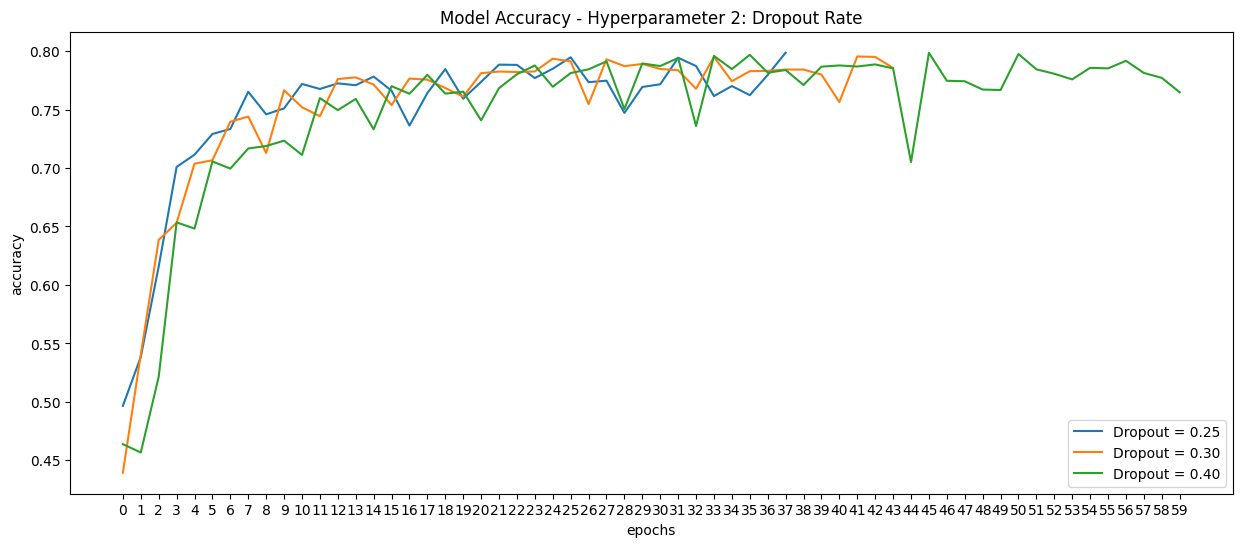

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(history_dropout_025.history['val_accuracy'])
plt.plot(history_dropout_03.history['val_accuracy'])
plt.plot(history_dropout_04.history['val_accuracy'])
plt.title('Model Accuracy - Hyperparameter 2: Dropout Rate')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Dropout = 0.25', 'Dropout = 0.30', 'Dropout = 0.40'], loc='lower right')
plt.xticks(range(0, 60))
plt.show()

In [7]:
# network definition batch size 64
model_batch_size_64 = Sequential()

model_batch_size_64.add(Conv2D(32, (3, 3), padding='same',input_shape=input_X_train.shape[1:]))
model_batch_size_64.add(Activation('relu'))
model_batch_size_64.add(Conv2D(32, (3, 3)))
model_batch_size_64.add(Activation('relu'))
model_batch_size_64.add(MaxPooling2D(pool_size=(2, 2)))
model_batch_size_64.add(Dropout(0.25))

model_batch_size_64.add(Conv2D(64, (3, 3), padding='same'))
model_batch_size_64.add(Activation('relu'))
model_batch_size_64.add(Conv2D(64, (3, 3)))
model_batch_size_64.add(Activation('relu'))
model_batch_size_64.add(MaxPooling2D(pool_size=(2, 2)))
model_batch_size_64.add(Dropout(0.25))

model_batch_size_64.add(Flatten())
model_batch_size_64.add(Dense(512))
model_batch_size_64.add(Activation('relu'))
model_batch_size_64.add(Dropout(0.25))

model_batch_size_64.add(Dense(N_CLASSES))
model_batch_size_64.add(Activation('softmax'))

model_batch_size_64.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

history_batch_size_64 = model_batch_size_64.fit(input_X_train, output_Y_train, batch_size=64, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_batch_size_64.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

history_batch_size_128 = model_batch_size_64.fit(input_X_train, output_Y_train, batch_size=128, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_batch_size_64.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

history_batch_size_256 = model_batch_size_64.fit(input_X_train, output_Y_train, batch_size=256, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE, callbacks=[early_stopping])
score = model_batch_size_64.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

Epoch 1/200
625/625 [==============================] - 7s 9ms/step - loss: 1.6698 - accuracy: 0.3977 - val_loss: 1.3583 - val_accuracy: 0.4991
Epoch 2/200
625/625 [==============================] - 5s 8ms/step - loss: 1.2047 - accuracy: 0.5725 - val_loss: 0.9963 - val_accuracy: 0.6496
Epoch 3/200
625/625 [==============================] - 5s 9ms/step - loss: 1.0027 - accuracy: 0.6481 - val_loss: 0.9014 - val_accuracy: 0.6820
Epoch 4/200
625/625 [==============================] - 5s 8ms/step - loss: 0.8892 - accuracy: 0.6908 - val_loss: 0.8855 - val_accuracy: 0.6948
Epoch 5/200
625/625 [==============================] - 6s 9ms/step - loss: 0.7950 - accuracy: 0.7229 - val_loss: 0.8038 - val_accuracy: 0.7231
Epoch 6/200
625/625 [==============================] - 5s 8ms/step - loss: 0.7490 - accuracy: 0.7419 - val_loss: 0.7652 - val_accuracy: 0.7387
Epoch 7/200
625/625 [==============================] - 5s 9ms/step - loss: 0.7085 - accuracy: 0.7571 - val_loss: 0.8019 - val_accuracy: 0.7392

In [8]:
model_batch_size_64.save_weights('cifar10_model_batch_size_64.h5', overwrite=True)

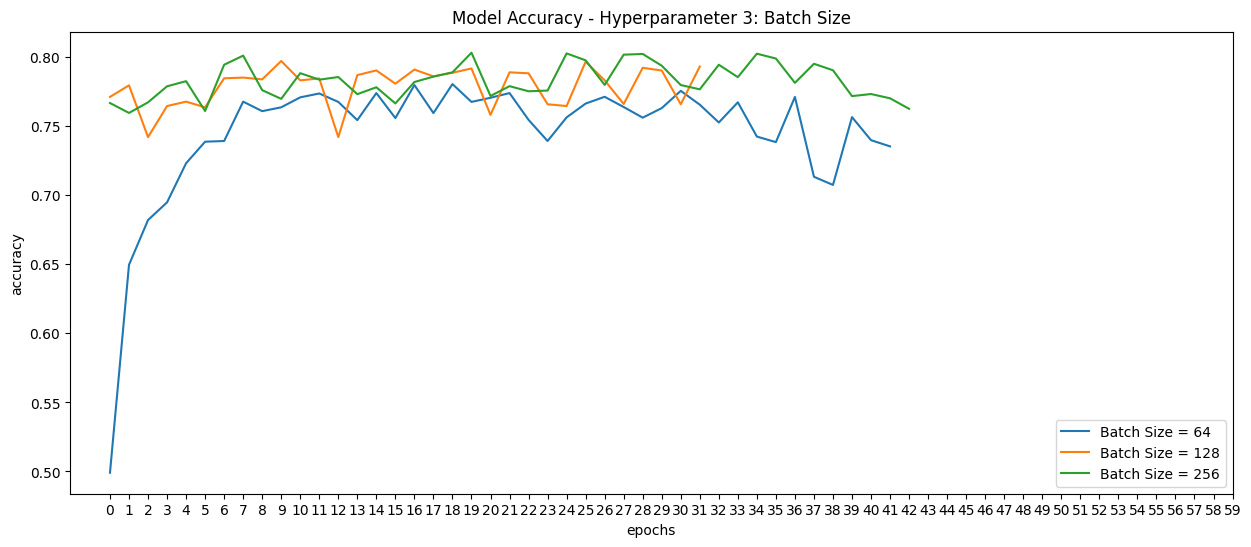

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(history_batch_size_64.history['val_accuracy'])
plt.plot(history_batch_size_128.history['val_accuracy'])
plt.plot(history_batch_size_256.history['val_accuracy'])
plt.title('Model Accuracy - Hyperparameter 3: Batch Size')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Batch Size = 64', 'Batch Size = 128', 'Batch Size = 256'], loc='lower right')
plt.xticks(range(0, 60))
plt.show()

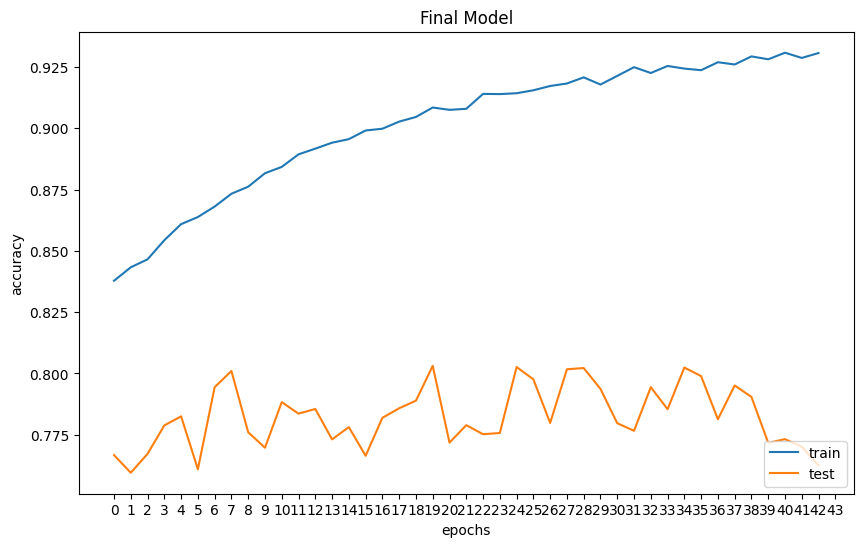

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history_batch_size_256.history['accuracy'])
plt.plot(history_batch_size_256.history['val_accuracy'])
plt.title('Final Model')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.xticks(range(0, 44))
plt.show()